# Demonstration of thrombolysis (IVT) + thromebctomy (MT) clinical outcome model

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clinical_outcome import Clinical_outcome

## Example using a single group/patient

The model takes input for patients or groups identically. Inputs are probabilibilites for that patient or group having different stroke types, and probabilities of being eligable for treatment. The group must have the same times to treatment (e.g. predicting outcome for a group of patients in a small area, all with the same time from onset to arrival at hospital).

Create a clinical outcome model object

In [2]:
outcome = Clinical_outcome()

Define inputs.

In [3]:
mimic = np.array([0]) # No mimics
ich = np.array([0.16]) # 16% ICH
nlvo = np.array([0.52]) # 52% NLVO
lvo = np.array([0.32]) # 32% LVO
onset_to_needle = np.array([100]) # 100 min onset to IVT
onset_to_puncture = np.array([150]) # 150 min onset to MT
nlvo_eligible_for_treatment = np.array([0.194]) # 19.4% NLVO treatable
lvo_eligible_for_treatment = np.array([0.313]) # 31.3% LVO treatable
prop_thrombolysed_lvo_receiving_thrombectomy = np.array([1]) # All MT have IVT

Get probabilities of good outcome.

In [4]:
outcomes=outcome.calculate_outcome_for_all(
    mimic,
    ich,
    nlvo,
    lvo,
    onset_to_needle,
    onset_to_puncture,
    nlvo_eligible_for_treatment,
    lvo_eligible_for_treatment,
    prop_thrombolysed_lvo_receiving_thrombectomy)

In [5]:
outcomes

array([0.36462703])

## Example using multiple groups or single patients

The model can prvide results for an array of patients/groups with different characteristics.

The model takes input for patients or groups identically. Inputs are probabilibilites for that patient or group having different stroke types, and probabilities of being eligable for treatment. The group must have the same times to treatment (e.g. predicting outcome for a group of patients in a small area, all with the same time from onset to arrival at hospital).

Create a clinical outcome model object

In [6]:
outcome = Clinical_outcome()

Define inputs. Here we will vary time of onset to IVT from 0 to 600 minutes, with MT (for eligable patients with LVO) being carried out 60 minutes later.

In [7]:
mimic = np.array([0]*21)
ich = np.array([0.16]*21)
nlvo = np.array([0.52]*21)
lvo = np.array([0.32]*21)
onset_to_needle = np.linspace(0,600,21)
onset_to_puncture = onset_to_needle + 60 
nlvo_eligible_for_treatment = np.array([1]*21)
lvo_eligible_for_treatment = np.array([1]*21)
prop_thrombolysed_lvo_receiving_thrombectomy = np.array([1]*21)

Get probabilities of good outcome.

In [8]:
outcomes=outcome.calculate_outcome_for_all(
    mimic,
    ich,
    nlvo,
    lvo,
    onset_to_needle,
    onset_to_puncture,
    nlvo_eligible_for_treatment,
    lvo_eligible_for_treatment,
    prop_thrombolysed_lvo_receiving_thrombectomy)

In [9]:
outcomes

array([0.54455378, 0.52642047, 0.50819722, 0.48996927, 0.47181846,
       0.45382138, 0.43604793, 0.41856022, 0.40141196, 0.38464817,
       0.34273311, 0.32124   , 0.32124   , 0.32124   , 0.32124   ,
       0.32124   , 0.32124   , 0.32124   , 0.32124   , 0.32124   ,
       0.32124   ])

Plot outcomes

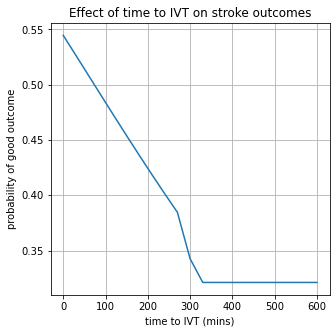

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(onset_to_needle, outcomes)
ax.set(xlabel='time to IVT (mins)', ylabel='probability of good outcome',
       title='Effect of time to IVT on stroke outcomes')
ax.grid()
plt.show()